## Introduction

Forest fires are a natural disaster that have been a hot topic for scientists, as of late, due to their increase in ferquency which coincides with the issue of climate change. In the United States alone, over 70,000 forest fires burn an average of 7 million acres every year (1). Wildfires are often directly influenced by human interaction, with close to 90% of them having some link to a man-made ignition point (1). Another major factor in the spread of forest fires is the topography of the land. Fire travels much faster uphill than downhill, as it is able to preheat the fuel above the flames, which also means that the steeper the gradient of the hill, the faster the fire will spread (2). Finally, the type of fuel the fire is burning through contributes to the speed, flame size, and temperature of the fire. Larger fuels, such as trees and heavy slash (fallen branches, brush, etc.), burns hotter, with a larger flame size, than smaller fuels such as grass and thin brush (spread out over a larger area) (3). Historically, forests have contained roughly 50-70 trees per acre, while today, in some parts of the United States, forests contain anywhere from 500-1000 trees per acre (4). This overcrowding of forests has led to both high mortality rates among trees, and explosive forest fires that devastate entire tree populations in record times.

The forest fire model clearly involves a multitude of physical factors, but the virtually unlimited variables can not all be evaluated in this project. Therefore, this research will only consider three physical attributes that can influence the spread of a fire: the varying slopes of hills and valleys, the type of fuel the fire is burning through, and the concentration of trees in the simulated forest. With lower burn impacts, ground vegetation will have less of a chance of spreading from cell to cell than larger fuels like the trees in this scenario. In order to mimic a forest that has sub-optimum conditions for a forest fire, the concentration of trees will start at 150 per designated acre. Finally, in an effort to mimic terrain that doesn't rise and fall in an easily modeled fashion, the slopes that trees are on will be generated in a semi-random fashion that will be described in further detail in the model section below. The larger the slope value, the more likely the transition from one cell to the next.

While forest fires can have conditions that change rapidly, it is necessary to set up some constants that will set the boundaries for the model below. The size of the forest will be predetermined for each experiment, but the simulation will end once the fire has left the selected section of forest. The goal of this simulation is to experiment with ways to reduce the transition rate of fire from one cell to the next, in an effort to determine actual physical measures that humans can take to limit the impact of forest fires. Therefore, multiple simulations will be run with different possible values for slope size, different rates of ground vegetation fire transition and varying density of trees per acre. By the end of this project, the research should convey data on how the aforementioned factors relate to the spread of fire, as well as which preventitive measures (changing the variables) achieved effective results.

## Model

With this research, it is important to limit the amount of variables and constants, as real-world forest fires have endless factors that play a role. Most of this project doesn't require units, as the outputs are simply meant to adjust burn probability. Thus, the first equation will generate a series of burn points based on an input slope, and the spacing between vegetation which will be defined by a random generator. These burn points will be used in the percolation equation to adjust the probability that a certain spot will catch on fire. The second equation will generate another list of burn points based on the input level of wind, which can be set to vary through a separate equation that generates wind values. These wind values will again be used in the final percolation equation. The percolation will take these burn points, and output burn probabilities for each cell in the simulation, while also adjusting using the ground vegetation and resources constants. Any probability above the determined percolation constant will result in a burned cell.

## Numerical Methods

I am using a two dimensional cellular animation to display the results of a percolation equation that calculates the burn probability of a cell. This equation will utilize a combination of random number generation, adjusted probability numbers and the constants mentioned above. The boundary for my research will be the end of the simulation, which represents the time at which the fire leaves the designated region. For the slope model specifically, I will be using the quadratic equation $-.1x^2$ to represent the hill that the fire will be travelling up and down. This equation gives slope values that are easy to work with, and fits well within the boundaries of our research. Also, the slope will be taken from the derivative of the function and used directly to calculate burn probabilities.

## Code

In [13]:
rng = np.random.default_rng()  # Create a default random number Generator
print(rng.uniform(1, 3))       # Test case

2.486072421563174


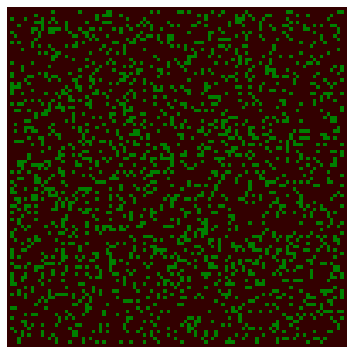

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors



#our slope equation is based on the quadtratic parabola created by -ax^2, as the slope of this mimics a hill
def slope(X):
    
    """Based on an input tree location list (x), generates a series of burn points for percolation equation."""
    
    
    r = rng.uniform(.1, .4)                             #generates a random hill slope gradient based
                                                             #on a negative quadratic derivative
    y = -r * float(rng.uniform(-3, 3))                                        
        
    y = float(y)
        
    if y > .25:
        X1[iy, ix] = FIRE                                #assigns a burn designation based on the slope
            
        
    elif -.25 < y < .25:
        x = np.random.random()
        if x <= .5:
            X1[iy, ix] = FIRE
        else:
            X1[iy, ix] = TREE
            
    else:
        x = np.random.random()
        if x < .25:
            X1[iy, ix] = FIRE
                
        else:
            X1[iy, ix] = TREE
            
        
    return X1[iy, ix]   



# Displacements from a cell to its eight nearest neighbours
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, UNCERTAIN, VEGETATION, FIRE = 0, 1, 2, 3, 4
# Colours for visualization: brown for EMPTY, dark green for TREE and orange
# for FIRE. Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)


def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    X1 = np.zeros((ny, nx))
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
            
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
            
            if X[iy, ix] == EMPTY and p < np.random.random() < b:
                X1[iy,ix] = VEGETATION
                
                for dx,dy in neighbourhood:
                    
                    if X[iy+dy,ix+dx] == UNCERTAIN:
                        slope(X)
                    
                    if X1[iy, ix] == VEGETATION:
                        x = np.random.random()
                        if x < .5:
                            X1[iy,ix] = FIRE
                        else:
                            X1[iy,ix] = EMPTY
                        break
                else:
                    if np.random.random() <= f:
                        X1[iy,ix] = FIRE
    return X1
# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, vegetation per empty cell, and of lightning strike.
p, b, f = 0.05, .85, .001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100
# Initialize the forest grid.
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = iterate(animate.X)
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X

# Interval between frames (ms).
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval)
plt.show()